<a href="https://colab.research.google.com/github/luntrum/luntrum/blob/main/phanloai_traicay.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [110]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [111]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler
from keras.utils import np_utils
from sklearn.utils import shuffle
import cv2
import matplotlib.pyplot as plt
import numpy as np
import pickle
import tensorflow as tf
import math as m
import os
from keras.layers import Dense, Activation, Dropout, BatchNormalization, LSTM,Conv2D, MaxPooling2D, Flatten
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical ,load_img, img_to_array
from tensorflow.keras.optimizers import RMSprop,SGD
from tensorflow.keras.models import load_model
from keras import callbacks
from keras.callbacks import EarlyStopping,ReduceLROnPlateau
# import ImageDataGenerator

In [112]:
drive.mount('/content/drive',force_remount=True)
# training_DIR= '/content/drive/MyDrive/Colab Notebooks/phanloai_traicay/data/'
# test_DIR='/content/drive/MyDrive/Colab Notebooks/phanloai_traicay/test/'
dau_dir='/content/drive/MyDrive/Colab Notebooks/phanloai_traicay/data/dau/'
mangcut_dir='/content/drive/MyDrive/Colab Notebooks/phanloai_traicay/data/mangcut/'
bo_dir='/content/drive/MyDrive/Colab Notebooks/phanloai_traicay/data/bo/'
xoai_dir='/content/drive/MyDrive/Colab Notebooks/phanloai_traicay/data/xoai/'
mit_dir='/content/drive/MyDrive/Colab Notebooks/phanloai_traicay/data/mit/'
nhan_dir='/content/drive/MyDrive/Colab Notebooks/phanloai_traicay/data/nhan/'
nho_dir='/content/drive/MyDrive/Colab Notebooks/phanloai_traicay/data/nho/'
oi_dir='/content/drive/MyDrive/Colab Notebooks/phanloai_traicay/data/oi/'
saurieng_dir='/content/drive/MyDrive/Colab Notebooks/phanloai_traicay/data/saurieng/'
vai_dir='/content/drive/MyDrive/Colab Notebooks/phanloai_traicay/data/vai/'


# print('total training dau images:', len(os.listdir(dau_dir)))
# print('total training xoai images:', len(os.listdir(mangcut_dir)))
# print('total training bo images:', len(os.listdir(bo_dir)))

dau_files = os.listdir(dau_dir)
print(dau_files[:50])

xoai_files = os.listdir(xoai_dir)
print(xoai_files[:50])

bo_files = os.listdir(bo_dir)
print(bo_files[:50])

mangcut_files = os.listdir(mangcut_dir)
print(bo_files[:50])

mit_files = os.listdir(mit_dir)
print(bo_files[:50])

nhan_files = os.listdir(nhan_dir)
print(bo_files[:50])

nho_files = os.listdir(nho_dir)
print(bo_files[:50])

oi_files = os.listdir(oi_dir)
print(bo_files[:50])

saurieng_files = os.listdir(saurieng_dir)
print(bo_files[:50])

vai_files = os.listdir(vai_dir)
print(bo_files[:50])


Mounted at /content/drive
['z3438428643805_a374668153226bcf96960ad3c2069e6b.jpg', 'z3438428712433_a3850389194a294d7eaf078509362df8.jpg', 'z3438428613199_cafee9760583b456bc194fa36837a1a3.jpg', 'z3438428691765_0b78b616a199c0a231345c87a0509cb9.jpg', 'z3438428703421_594573beb21a870893e9594b680b27f3.jpg', 'z3438428710519_b942b5451e394160433236f04ae4cebf.jpg', 'z3438428699037_f7964ebffc5ee3d9a8d926eb5c4d60b1.jpg', 'z3438428694079_dcb9992ce0a5481513657a288a05482d.jpg', 'z3438428691843_357fe33f8cd3efadc84a79ec1dd9fdb9.jpg', 'z3438428680490_35baeb3055aedcfaf7ac8f0f0b02f0aa.jpg', 'z3438428679278_0792b4b2d1bb14d9fd0a1b30e0cd8cbf.jpg', 'z3438428718798_a3a62e9f20acf59bfa91804f18286e1f.jpg', 'z3438428660780_f7c09234450d34d225dddb583a597f56.jpg', 'z3438428674115_faa6941d348d6066a2ecfe9506cc197d.jpg', 'z3438428685522_655dcf5efe27c0702b8e0f85d9b6e873.jpg', 'z3438428651281_827d64d2cbd5d94060941fd5471005c9.jpg', 'z3438428632305_2b1023981f4da7e42a8c0d4364e3e0d5.jpg', 'z3438428654968_c155b71fed1625a7ca0053

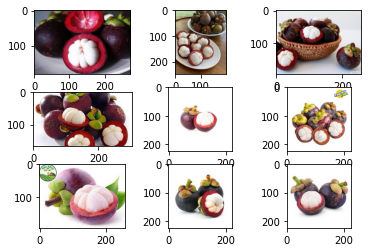

In [113]:
import matplotlib.pyplot as plt
from matplotlib.image import imread
folder = '/content/drive/MyDrive/Colab Notebooks/phanloai_traicay/data/mangcut/'
for i in range(9):
  plt.subplot(330+i+1)
  filename = folder + 'mangcut' + str(i) + '.jpg'
  image = imread(filename)
  plt.imshow(image)
plt.show()

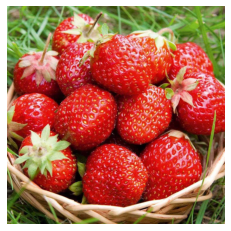

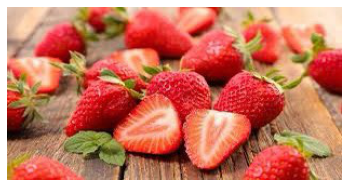

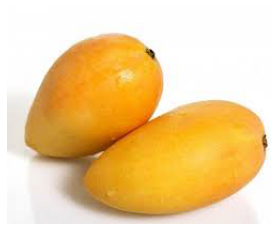

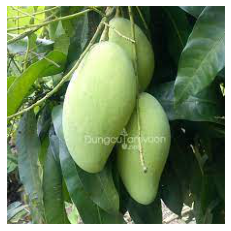

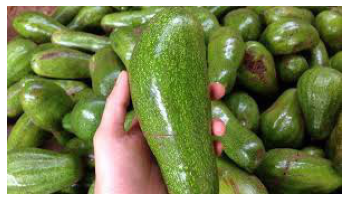

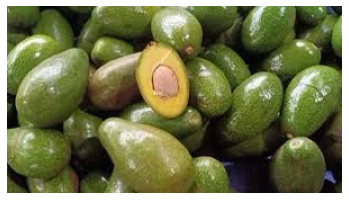

In [10]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

pic_index = 2

next_dau = [os.path.join(dau_dir, fname) 
                for fname in dau_files[pic_index-2:pic_index]]
next_xoai = [os.path.join(xoai_dir, fname) 
                for fname in xoai_files[pic_index-2:pic_index]]
next_bo = [os.path.join(bo_dir, fname) 
                for fname in bo_files[pic_index-2:pic_index]]

for i, img_path in enumerate(next_dau+next_xoai+next_bo):
  #print(img_path)
  img = mpimg.imread(img_path)
  plt.imshow(img)
  plt.axis('Off')
  plt.show()

In [69]:
import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator



model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(100, 100, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.25),
    # The second convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.25),
    # The third convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.25),
    # The fourth convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.25),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(499, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.summary()

model.compile(loss = 'categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])


# model.save("rps.h5")




Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 98, 98, 64)        1792      
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 49, 49, 64)       0         
 g2D)                                                            
                                                                 
 dropout_20 (Dropout)        (None, 49, 49, 64)        0         
                                                                 
 conv2d_17 (Conv2D)          (None, 47, 47, 64)        36928     
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 23, 23, 64)       0         
 g2D)                                                            
                                                                 
 dropout_21 (Dropout)        (None, 23, 23, 64)       

In [117]:
TRAINING_DIR ="/content/drive/MyDrive/Colab Notebooks/phanloai_traicay/data/"
training_datagen = ImageDataGenerator(
                                rotation_range=15,
                                rescale=1./255,
                                shear_range=0.1,
                                zoom_range=0.2,
                                horizontal_flip=True,
                                width_shift_range=0.1,
                                height_shift_range=0.1)

train_generator = training_datagen.flow_from_directory(
	directory="/content/drive/MyDrive/Colab Notebooks/phanloai_traicay/data/",
	target_size=(100,100),
	class_mode='categorical',
  subset='training',
  shuffle=True
  # batch_size=336
)

VALIDATION_DIR ="/content/drive/MyDrive/Colab Notebooks/phanloai_traicay/test/"
# validation_datagen = ImageDataGenerator(rescale = 1./255)
validation_generator = training_datagen.flow_from_directory(
	directory="/content/drive/MyDrive/Colab Notebooks/phanloai_traicay/test/",
	target_size=(100,100),
	class_mode='categorical',
  subset='validation',
  shuffle=True
  # batch_size=336
)

Found 499 images belonging to 10 classes.
Found 0 images belonging to 10 classes.


In [118]:
earlystop = EarlyStopping(patience = 10)
learning_rate_reduction = ReduceLROnPlateau(monitor = 'val_acc',patience = 2,verbose = 1,factor = 0.5,min_lr = 0.00001)
callbacks = [earlystop,learning_rate_reduction]

In [120]:
history = model.fit(train_generator,batch_size=10, epochs=50, validation_data = validation_generator, verbose = 0.5)


Epoch 1/50
Epoch 2/50
Epoch 3/50
Epoch 4/50
Epoch 5/50
Epoch 6/50
Epoch 7/50
Epoch 8/50
Epoch 9/50
Epoch 10/50
Epoch 11/50
Epoch 12/50
Epoch 13/50
Epoch 14/50
Epoch 15/50
Epoch 16/50
Epoch 17/50
Epoch 18/50
Epoch 19/50
Epoch 20/50
Epoch 21/50
Epoch 22/50
Epoch 23/50
Epoch 24/50
Epoch 25/50
Epoch 26/50
Epoch 27/50
Epoch 28/50
Epoch 29/50
Epoch 30/50
Epoch 31/50
Epoch 32/50
Epoch 33/50
Epoch 34/50
Epoch 35/50
Epoch 36/50
Epoch 37/50
Epoch 38/50
Epoch 39/50
Epoch 40/50
Epoch 41/50
Epoch 42/50
Epoch 43/50
Epoch 44/50
Epoch 45/50
Epoch 46/50
Epoch 47/50
Epoch 48/50
Epoch 49/50
Epoch 50/50


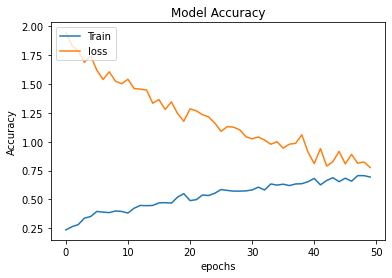

In [121]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
#plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epochs')
plt.legend(['Train','loss'],loc='upper left')
plt.show()

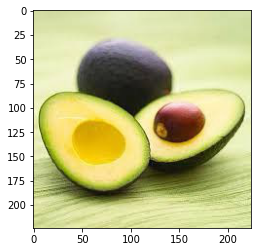

Đây là bơ


In [73]:
filename = '/content/drive/MyDrive/Colab Notebooks/phanloai_traicay/test/bo/1.jpg'  
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread(filename)
imgplot = plt.imshow(img)
plt.show()

img = load_img(filename,target_size = (100,100))
img = img_to_array(img)
img =  img.reshape(1,100,100,3)
img = img.astype('float32')
img = img/255
kq = np.argmax(model.predict(img),axis= -1)
if kq==0:
  print('Đây là bơ')
elif kq ==1:
  print('Day la dâu')
elif kq ==2:
  print('Day la măng cụt')
elif kq ==3:
  print('Day la mít')
elif kq ==4:
  print('Day la nhãn')
elif kq ==5:
  print('Day la nho')
elif kq ==6:
  print('Day la ổi')
elif kq ==7:
  print('Day la sầu riêng')
elif kq ==8:
  print('Day la vải')
elif kq ==9:
  print('Day la xoài')

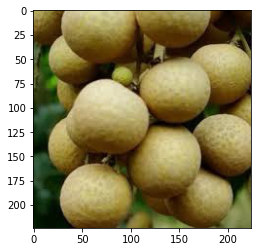

Day la nhãn


In [90]:
filename = '/content/drive/MyDrive/Colab Notebooks/phanloai_traicay/test/nhan/4.jpg'  
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread(filename)
imgplot = plt.imshow(img)
plt.show()

img = load_img(filename,target_size = (100,100))
img = img_to_array(img)
img =  img.reshape(1,100,100,3)
img = img.astype('float32')
img = img/255
kq = np.argmax(model.predict(img),axis= -1)
if kq==0:
  print('Đây là bơ')
elif kq ==1:
  print('Day la dâu')
elif kq ==2:
  print('Day la măng cụt')
elif kq ==3:
  print('Day la mít')
elif kq ==4:
  print('Day la nhãn')
elif kq ==5:
  print('Day la nho')
elif kq ==6:
  print('Day la ổi')
elif kq ==7:
  print('Day la sầu riêng')
elif kq ==8:
  print('Day la vải')
elif kq ==9:
  print('Day la xoài')

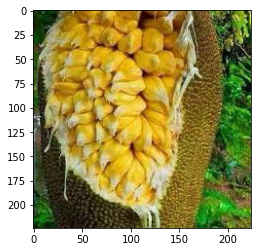

Day la mít


In [108]:
filename = '/content/drive/MyDrive/Colab Notebooks/phanloai_traicay/test/mit/3.jpg'  
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread(filename)
imgplot = plt.imshow(img)
plt.show()

img = load_img(filename,target_size = (100,100))
img = img_to_array(img)
img =  img.reshape(1,100,100,3)
img = img.astype('float32')
img = img/255
kq = np.argmax(model.predict(img),axis= -1)
if kq==0:
  print('Đây là bơ')
elif kq ==1:
  print('Day la dâu')
elif kq ==2:
  print('Day la măng cụt')
elif kq ==3:
  print('Day la mít')
elif kq ==4:
  print('Day la nhãn')
elif kq ==5:
  print('Day la nho')
elif kq ==6:
  print('Day la ổi')
elif kq ==7:
  print('Day la sầu riêng')
elif kq ==8:
  print('Day la vải')
elif kq ==9:
  print('Day la xoài')